In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
df = pd.read_csv('Cleaned_data_3MA_GameDateOrder_WINPCTUpdated.csv')

In [3]:
df.info(120)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41284 entries, 0 to 41283
Data columns (total 87 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   corsiPercentage_3MA                         41284 non-null  float64
 1   fenwickPercentage_3MA                       41284 non-null  float64
 2   xOnGoalFor_3MA                              41284 non-null  float64
 3   xGoalsFor_3MA                               41284 non-null  float64
 4   xReboundsFor_3MA                            41284 non-null  float64
 5   xPlayStoppedFor_3MA                         41284 non-null  float64
 6   xPlayContinuedInZoneFor_3MA                 41284 non-null  float64
 7   xPlayContinuedOutsideZoneFor_3MA            41284 non-null  float64
 8   shotsOnGoalFor_3MA                          41284 non-null  float64
 9   missedShotsFor_3MA                          41284 non-null  float64
 10  blockedSho

In [4]:
df['gameDate'] = df['gameDate'].astype('datetime64[ns]')

In [5]:
df.info(120)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41284 entries, 0 to 41283
Data columns (total 87 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   corsiPercentage_3MA                         41284 non-null  float64       
 1   fenwickPercentage_3MA                       41284 non-null  float64       
 2   xOnGoalFor_3MA                              41284 non-null  float64       
 3   xGoalsFor_3MA                               41284 non-null  float64       
 4   xReboundsFor_3MA                            41284 non-null  float64       
 5   xPlayStoppedFor_3MA                         41284 non-null  float64       
 6   xPlayContinuedInZoneFor_3MA                 41284 non-null  float64       
 7   xPlayContinuedOutsideZoneFor_3MA            41284 non-null  float64       
 8   shotsOnGoalFor_3MA                          41284 non-null  float64       
 9   missed

In [6]:
df['home_or_away'].head()

,home_or_away
0,AWAY
1,HOME
2,HOME
3,HOME
4,HOME


In [7]:
df['home_or_away'] = df['home_or_away'].map({'HOME': 1, 'AWAY': 0})


In [8]:
print(df['home_or_away'].dtype)

int64


In [9]:
df.info(120)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41284 entries, 0 to 41283
Data columns (total 87 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   corsiPercentage_3MA                         41284 non-null  float64       
 1   fenwickPercentage_3MA                       41284 non-null  float64       
 2   xOnGoalFor_3MA                              41284 non-null  float64       
 3   xGoalsFor_3MA                               41284 non-null  float64       
 4   xReboundsFor_3MA                            41284 non-null  float64       
 5   xPlayStoppedFor_3MA                         41284 non-null  float64       
 6   xPlayContinuedInZoneFor_3MA                 41284 non-null  float64       
 7   xPlayContinuedOutsideZoneFor_3MA            41284 non-null  float64       
 8   shotsOnGoalFor_3MA                          41284 non-null  float64       
 9   missed

In [10]:
df_new = df[['season', 'name', 'opposingTeam', 'Game_Number', 'win_indicator', 'gameDate']].copy()


In [11]:


columns_to_delete = [
    'Game_Number',
    'season', 'name', 'opposingTeam', 'gameDate'
]

df = df.drop(columns=[col for col in columns_to_delete if col in df.columns])


In [12]:
df.info(120)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41284 entries, 0 to 41283
Data columns (total 82 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   corsiPercentage_3MA                         41284 non-null  float64
 1   fenwickPercentage_3MA                       41284 non-null  float64
 2   xOnGoalFor_3MA                              41284 non-null  float64
 3   xGoalsFor_3MA                               41284 non-null  float64
 4   xReboundsFor_3MA                            41284 non-null  float64
 5   xPlayStoppedFor_3MA                         41284 non-null  float64
 6   xPlayContinuedInZoneFor_3MA                 41284 non-null  float64
 7   xPlayContinuedOutsideZoneFor_3MA            41284 non-null  float64
 8   shotsOnGoalFor_3MA                          41284 non-null  float64
 9   missedShotsFor_3MA                          41284 non-null  float64
 10  blockedSho

In [13]:
numeric_vars = df.select_dtypes(include=['float', 'int']).columns
df_numeric = df[numeric_vars]

In [14]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41284 entries, 0 to 41283
Data columns (total 82 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   corsiPercentage_3MA                         41284 non-null  float64
 1   fenwickPercentage_3MA                       41284 non-null  float64
 2   xOnGoalFor_3MA                              41284 non-null  float64
 3   xGoalsFor_3MA                               41284 non-null  float64
 4   xReboundsFor_3MA                            41284 non-null  float64
 5   xPlayStoppedFor_3MA                         41284 non-null  float64
 6   xPlayContinuedInZoneFor_3MA                 41284 non-null  float64
 7   xPlayContinuedOutsideZoneFor_3MA            41284 non-null  float64
 8   shotsOnGoalFor_3MA                          41284 non-null  float64
 9   missedShotsFor_3MA                          41284 non-null  float64
 10  blockedSho

In [15]:
X = df_numeric.drop(columns=['win_indicator'])
y = df_numeric['win_indicator']

In [16]:
#scalar -

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_df = X.copy()
scaled_df = pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)
scaled_df.head()

,corsiPercentage_3MA,fenwickPercentage_3MA,xOnGoalFor_3MA,xGoalsFor_3MA,xReboundsFor_3MA,xPlayStoppedFor_3MA,xPlayContinuedInZoneFor_3MA,xPlayContinuedOutsideZoneFor_3MA,shotsOnGoalFor_3MA,missedShotsFor_3MA,...,dZoneGiveawaysAgainst_3MA,xGoalsFromxReboundsOfShotsAgainst_3MA,xGoalsFromActualReboundsOfShotsAgainst_3MA,reboundxGoalsAgainst_3MA,totalShotCreditAgainst_3MA,past_wins_3MA,past_games_3MA,home_or_away,playoffGame,running_win_pct
0,0.709688,0.406083,-0.163774,-0.966544,-0.809031,0.970074,-0.002030,0.757607,0.274709,-0.244398,...,-0.436386,-0.845324,-0.858396,-0.893305,-0.863231,-1.357197,-1.640537,-0.994589,-0.27446,4.216262
1,-0.465224,-0.660425,-1.142948,-1.092911,-1.352779,-1.106419,-0.865939,-0.952448,-0.864740,-0.850278,...,-0.711539,-0.213311,0.502803,0.464291,0.146704,-1.279332,-1.599639,1.005441,-0.27446,4.216262
2,-1.197786,-1.427829,-1.408101,-0.758121,-0.613814,-1.415684,-1.167255,-1.746630,-1.320519,-0.850278,...,-0.023657,0.165006,-0.571576,-0.607244,-0.417653,-1.435062,-1.640537,1.005441,-0.27446,-0.955125
3,1.064463,1.383873,0.306086,-0.046966,0.751689,-0.054918,0.320065,0.345136,-0.484924,1.452066,...,-0.711539,-0.987750,-1.041244,-1.075668,-1.175576,-1.357197,-1.640537,1.005441,-0.27446,4.216262
4,1.074691,0.932682,0.331992,-1.333609,-0.000564,-0.037246,0.752435,0.888004,0.350672,0.361482,...,-0.298810,-0.275623,-0.342120,-0.378396,-0.291961,-1.512927,-1.640537,1.005441,-0.27446,-3.536942


In [17]:
#Here, I only conduct a six-component PCA. Feel free to try greater components by yourself.
from sklearn.decomposition import PCA

pca = PCA(n_components=18, svd_solver = 'auto') # can change the number of components to be whatever, will probably need a few more in my dataset due to the fact that it is a lot larger
Principal_components=pca.fit_transform(scaled_df)

#variance explained
print ("Proportion of Variance Explained: ", pca.explained_variance_ratio_)
out_sum = np.cumsum(pca.explained_variance_ratio_)
print ("Cumulative Proportion of Variance Explained: ", out_sum)



Proportion of Variance Explained:  [0.23491728 0.14884642 0.05569816 0.05227946 0.04087217 0.03287037
 0.03206198 0.02876454 0.02369813 0.02267072 0.02187527 0.02043115
 0.01684091 0.01605911 0.0145425  0.01423055 0.01337909 0.01288513]
Cumulative Proportion of Variance Explained:  [0.23491728 0.3837637  0.43946187 0.49174133 0.5326135  0.56548387
 0.59754585 0.62631039 0.65000852 0.67267924 0.69455451 0.71498566
 0.73182658 0.74788568 0.76242818 0.77665873 0.79003782 0.80292295]


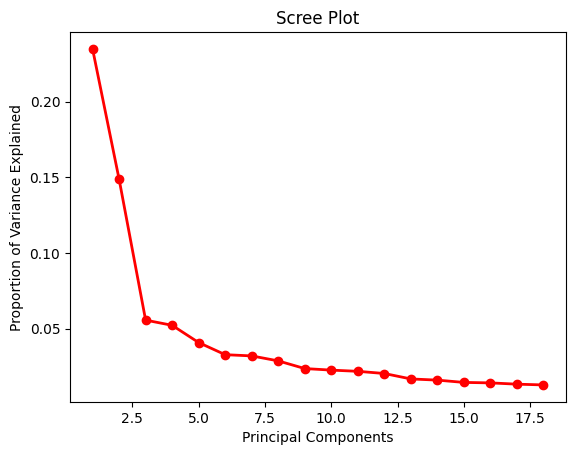

In [18]:
import matplotlib.pyplot as plt

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [19]:
#eigenvalue of each principal component
print(pca.explained_variance_)

#Should only keep htose that are greater than 1 ^^^^

[19.02876069 12.05685233  4.51166043  4.23473893  3.31072614  2.66256463
  2.59708333  2.32998425  1.91959479  1.83637293  1.7719396   1.6549634
  1.36414703  1.30081919  1.17797078  1.1527024   1.08373258  1.04372089]


In [20]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
                                                     'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18'],
                        index=X.columns)
print(loadings)


                            PC1       PC2       PC3       PC4       PC5  \
corsiPercentage_3MA    0.216202 -0.006115 -0.058715  0.061684  0.010821   
fenwickPercentage_3MA  0.225383 -0.009556 -0.025835  0.031263  0.006205   
xOnGoalFor_3MA         0.178018  0.167645 -0.053513 -0.036780 -0.029805   
xGoalsFor_3MA          0.122280  0.161706  0.247532 -0.011877 -0.030735   
xReboundsFor_3MA       0.173219  0.163108 -0.010094 -0.020974 -0.056339   
...                         ...       ...       ...       ...       ...   
past_wins_3MA          0.025098  0.031359  0.007617 -0.105681  0.210086   
past_games_3MA         0.002593  0.024972 -0.014305 -0.087988  0.187856   
home_or_away           0.024098 -0.000411 -0.007305 -0.020072 -0.009412   
playoffGame            0.003699  0.031520 -0.011091 -0.097363  0.213541   
running_win_pct        0.051233  0.018915  0.082072 -0.086263  0.080763   

                            PC6       PC7       PC8       PC9      PC10  \
corsiPercentage_3MA    0

In [21]:
# Ensure pandas displays all rows and columns neatly
pd.set_option('display.float_format', '{:.4f}'.format)  # Limit decimal places for clarity
pd.set_option('display.max_rows', None)  # Show all rows if necessary
pd.set_option('display.max_columns', None)  # Show all columns

# Print the DataFrame in a structured way
from IPython.display import display

display(loadings)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
corsiPercentage_3MA,0.2162,-0.0061,-0.0587,0.0617,0.0108,0.0014,-0.0158,0.0089,-0.0133,-0.0150,-0.0169,-0.0128,-0.0121,0.0041,0.0194,0.0000,0.0114,-0.1136
fenwickPercentage_3MA,0.2254,-0.0096,-0.0258,0.0313,0.0062,0.0065,0.0009,-0.0084,-0.0311,-0.0121,-0.0260,-0.0092,0.0018,-0.0006,0.0186,0.0218,-0.0129,0.0379
xOnGoalFor_3MA,0.1780,0.1676,-0.0535,-0.0368,-0.0298,-0.0162,-0.0104,-0.0114,-0.0096,-0.0169,-0.0349,0.0066,-0.0130,-0.0154,-0.0116,0.0114,-0.0004,0.0340
xGoalsFor_3MA,0.1223,0.1617,0.2475,-0.0119,-0.0307,0.0164,0.0653,0.0424,0.0460,-0.0136,-0.0666,-0.0715,-0.0095,-0.0074,-0.0265,-0.1433,0.0833,-0.0051
xReboundsFor_3MA,0.1732,0.1631,-0.0101,-0.0210,-0.0563,-0.0000,0.0485,0.0052,0.0591,0.0073,-0.0050,-0.0131,-0.0028,-0.0350,-0.0199,0.0189,-0.0125,0.0252
xPlayStoppedFor_3MA,0.1705,0.1673,-0.0436,-0.0258,-0.0155,-0.0359,-0.0244,-0.0417,0.0100,0.0016,-0.0109,0.0308,0.0017,-0.0206,0.0044,0.0324,-0.0186,0.0205
xPlayContinuedInZoneFor_3MA,0.1810,0.1438,-0.1200,-0.0383,-0.0366,-0.0117,0.0038,-0.0147,-0.0245,-0.0062,-0.0267,0.0278,-0.0194,-0.0112,0.0024,0.0311,0.0205,0.0202
xPlayContinuedOutsideZoneFor_3MA,0.1648,0.1404,-0.1444,-0.0679,-0.0410,-0.0163,-0.0308,0.0031,-0.0770,-0.0330,-0.0430,0.0143,-0.0188,0.0319,-0.0335,0.0528,0.0010,0.0449
shotsOnGoalFor_3MA,0.1659,0.1377,-0.0583,-0.0588,-0.0951,0.0151,-0.0024,0.0596,-0.0944,-0.0694,0.0755,-0.0061,-0.0089,0.0201,0.0065,0.0086,-0.0908,0.1132
missedShotsFor_3MA,0.1190,0.1094,-0.0819,0.0048,0.0874,-0.0591,-0.0290,-0.1298,0.0646,0.0942,-0.1728,0.0776,-0.0139,-0.0079,-0.0166,0.0296,0.1642,-0.1186


In [22]:
row_sums = loadings.sum(axis=1).to_dict()

for name, total in row_sums.items():
    if total > 0.3:
        print(f"{name}: {total}")



xGoalsFor_3MA: 0.3986731354422826
xReboundsFor_3MA: 0.3248033172749233
goalsFor_3MA: 0.6768997015244611
reboundsFor_3MA: 0.5727137357700137
reboundGoalsFor_3MA: 0.7627185141793635
penalityMinutesFor_3MA: 0.3445258897903748
hitsFor_3MA: 0.8651701148955168
takeawaysFor_3MA: 1.2821199378031165
giveawaysFor_3MA: 0.7605015981151357
mediumDangerShotsFor_3MA: 0.6260339042415849
lowDangerxGoalsFor_3MA: 0.42983949382490494
mediumDangerxGoalsFor_3MA: 0.6417256500868945
lowDangerGoalsFor_3MA: 0.7866732421034535
mediumDangerGoalsFor_3MA: 0.3307060112317041
dZoneGiveawaysFor_3MA: 0.6498515750608322
xGoalsFromActualReboundsOfShotsFor_3MA: 0.6685172593208606
reboundxGoalsFor_3MA: 0.6596967054555952
xGoalsAgainst_3MA: 0.5955586233430633
flurryAdjustedxGoalsAgainst_3MA: 0.6265338135429983
blockedShotAttemptsAgainst_3MA: 0.33087214135064646
goalsAgainst_3MA: 0.6183703382373141
penalityMinutesAgainst_3MA: 0.321770010902676
hitsAgainst_3MA: 0.5616795325527147
takeawaysAgainst_3MA: 0.6586052112536528
highD

In [23]:
for name, total in row_sums.items():
    if total <= 0.3:
        print(f"Row '{name}' does not meet the criteria: {total}")

Row 'corsiPercentage_3MA' does not meet the criteria: 0.06956816913980349
Row 'fenwickPercentage_3MA' does not meet the criteria: 0.21454548601770962
Row 'xOnGoalFor_3MA' does not meet the criteria: 0.1378243486209338
Row 'xPlayStoppedFor_3MA' does not meet the criteria: 0.20233744595995812
Row 'xPlayContinuedInZoneFor_3MA' does not meet the criteria: 0.12104195212390474
Row 'xPlayContinuedOutsideZoneFor_3MA' does not meet the criteria: -0.052376270376750744
Row 'shotsOnGoalFor_3MA' does not meet the criteria: 0.11798370288947313
Row 'missedShotsFor_3MA' does not meet the criteria: 0.12087096587427007
Row 'blockedShotAttemptsFor_3MA' does not meet the criteria: -0.0035452320462314446
Row 'shotAttemptsFor_3MA' does not meet the criteria: 0.1085241783880797
Row 'freezeFor_3MA' does not meet the criteria: -0.353349211575155
Row 'playStoppedFor_3MA' does not meet the criteria: 0.21912777520201357
Row 'playContinuedInZoneFor_3MA' does not meet the criteria: 0.2963486938155598
Row 'playConti

In [24]:
#performance indicators with an absolute factor loading of greater than 3 should be selected

In [25]:
import pandas as pd

# Get the PCA component names (you can customize the names as needed)
pc_columns = [f'PC{i+1}' for i in range(pca.n_components_)]

# Convert the PCA result back into a DataFrame with appropriate column names
principal_df = pd.DataFrame(Principal_components, columns=pc_columns)

# If you'd like to include the original index, you can do so like this:
principal_df.index = scaled_df.index

# Display the resulting DataFrame
principal_df.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,1.8969,-3.3150,-1.0713,-0.9751,-1.6246,0.0168,0.1094,0.2189,-2.5105,2.0164,-2.4009,0.5750,0.8176,1.0647,-0.1081,1.5608,-0.8164,0.1480
1,-3.0095,-3.1036,1.0358,1.4134,-0.7672,1.9545,0.6574,-0.5301,-3.0836,2.4803,-1.4767,0.4822,1.5114,0.8893,1.8135,0.8715,0.0365,-0.8149
2,-4.9859,-2.2000,-0.0426,-2.0873,-0.6759,-1.1884,1.0429,-0.2055,1.5065,4.8940,-0.1137,0.0273,0.9487,-0.6433,-0.8012,0.1882,0.4630,-1.0464
3,5.4830,-3.7610,2.1829,-0.6000,0.3588,-1.0886,0.5933,-2.9350,-0.5419,1.7172,-0.9307,-0.1005,-0.0848,1.1002,2.6935,1.8348,0.3482,-0.6116
4,2.8140,-3.5338,-5.0022,3.0253,-1.5137,-1.3251,0.8070,2.5296,-1.1950,2.9383,-1.4728,1.8209,0.7944,1.3476,-0.9451,1.5726,0.2042,-0.6007


In [26]:
combined_df = pd.concat([principal_df, df_new], axis=1)

# Display the resulting combined DataFrame
combined_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,season,name,opposingTeam,Game_Number,win_indicator,gameDate
0,1.8969,-3.3150,-1.0713,-0.9751,-1.6246,0.0168,0.1094,0.2189,-2.5105,2.0164,-2.4009,0.5750,0.8176,1.0647,-0.1081,1.5608,-0.8164,0.1480,2008,NYR,PHI,4,1,2008-10-11
1,-3.0095,-3.1036,1.0358,1.4134,-0.7672,1.9545,0.6574,-0.5301,-3.0836,2.4803,-1.4767,0.4822,1.5114,0.8893,1.8135,0.8715,0.0365,-0.8149,2008,NYR,N.J,5,1,2008-10-13
2,-4.9859,-2.2000,-0.0426,-2.0873,-0.6759,-1.1884,1.0429,-0.2055,1.5065,4.8940,-0.1137,0.0273,0.9487,-0.6433,-0.8012,0.1882,0.4630,-1.0464,2008,PIT,PHI,4,1,2008-10-14
3,5.4830,-3.7610,2.1829,-0.6000,0.3588,-1.0886,0.5933,-2.9350,-0.5419,1.7172,-0.9307,-0.1005,-0.0848,1.1002,2.6935,1.8348,0.3482,-0.6116,2008,S.J,CBJ,4,1,2008-10-14
4,2.8140,-3.5338,-5.0022,3.0253,-1.5137,-1.3251,0.8070,2.5296,-1.1950,2.9383,-1.4728,1.8209,0.7944,1.3476,-0.9451,1.5726,0.2042,-0.6007,2008,ANA,EDM,4,0,2008-10-15


In [27]:
combined_df.to_csv('PCA_df_w_game_markersUPDATED.csv', index=False)